In [1]:
import numpy as np
import pandas as pd 
import time 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [2]:
iris_ds = load_iris()

In [3]:
X,y = iris_ds.data,iris_ds.target
print("X.shape:",X.shape,"y.shape:",y.shape)

X.shape: (150, 4) y.shape: (150,)


In [4]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=3)

In [5]:
print("Xtrain.shape:",Xtrain.shape,"ytrain.shape:",ytrain.shape)
print(f"\nXtrain[:5]:\n{Xtrain[:5]}\n\nytrain[:5]:\n{ytrain[:5]}")

Xtrain.shape: (120, 4) ytrain.shape: (120,)

Xtrain[:5]:
[[5.8 4.  1.2 0.2]
 [4.8 3.4 1.9 0.2]
 [6.9 3.1 5.4 2.1]
 [6.6 2.9 4.6 1.3]
 [4.4 2.9 1.4 0.2]]

ytrain[:5]:
[0 0 2 1 0]


In [6]:
idx_to_target = {}
for idx,target in enumerate(iris_ds.target_names):
    idx_to_target[idx] = target
print(idx_to_target)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [7]:
Xtrain = Xtrain.T
ytrain = ytrain.T.reshape(1,-1)
print("Xtrain.shape:",Xtrain.shape,"\tytrain.shape:",ytrain.shape)

Xtrain.shape: (4, 120) 	ytrain.shape: (1, 120)


In [8]:
# init layer
def run(X,y,epochs=100,lr=0.0001):
    np.random.seed(5)
    m = y.shape[1]
    costs = []
    params = {}
    # init layers 
    layer_dims = [4,5,3] 
    n_x = layer_dims[0]
    n_h = layer_dims[1]
    n_y = layer_dims[2]
    # init weights and bias
    w1 = 2 * np.random.rand(n_x,n_h) - 1
    w2 = 2 * np.random.rand(n_h,n_y) - 1  

    b1 = np.zeros(shape=(n_h,1))
    b2 = np.zeros(shape=(n_y,1))
    
    for ep in range(epochs):
        # forward prop
        z1 = np.dot(w1.T,X) + b1 # (4,5).T @ (4,120) + (5,1) = (5,120)
        a1 = np.tanh(z1) # (5,120)
        z2 = np.dot(w2.T,a1) + b2 # (5,3).T @ (5,120) + (3,1) = (3,120)
        a2 = 1 / (1 + np.exp(z2)) # (3,120)
        # store the values for back prop
        cache = {"z1":z1,"a1":a1,"z2":z2,"a2":a2}
        #print("Shape A2:",a2.shape)
        #print("Shape y:",y.shape)
        loss = np.multiply(np.log(a2),y) + np.multiply(np.log(1-a2),(1-y))
        cost = np.sum(loss) * -1 / m 
        cost = np.squeeze(cost)
        #if ep>50 and cost> costs[-1] and cost>costs[-2] and cost>costs[-3]: # Check condition. I add early_stopping condition as greedy.
        #    print("Early stopping is applied.. So stopped training.")
        #    params = {"w1":w1,"b1":b1,"w2":w2,"b2":b2}
        #    break
            
        costs.append(cost)

            
        params = {"w1":w1,"b1":b1,"w2":w2,"b2":b2}
        #print("w1.shape:",params["w1"].shape)
        # backpropagation
        dz2 = a2 - y # (3,120) - (1,120) = (3,120)
        
        dw2 = np.dot(a1,dz2.T) / m # (5,120) @ (3,120).T = (5,3)
        db2 = np.sum(dz2,axis=1,keepdims=True) / m # (3,1)
    
        tanh_deriv = 1 - np.power(a1,2) # (5,120)
        dz1 = np.multiply(np.dot(w2,dz2),tanh_deriv) #   (5,3) @ (3,120) * (5,120) = (5,120)
        
        dw1 = np.dot(X,dz1.T) / m # (4,120) @ (5,120).T = (4,5)
        db1 = np.sum(dz1,axis=1,keepdims=True) / m # (5,1)
        
                
        if ep %10000 == 0 :
            print("Epoch",ep,"cost:",cost)
            #print("dw1:",dw1)
            #print("dw2:",dw2)
            #print("a1:",a1)
            #print("a2:",a2)
            
        # update weights and biases 

        w1 -= lr * dw1 # (4,5) - (4,5)
        w2 -= lr * dw2 # (5,3) - (5,3)
        b1 -= lr * db1 # (5,1) - (5,1)
        b2 -= lr * db2 # (3,1) - (3,1)
        
        if dw1.any() == 0 or dw2.any() == 0:
            print("Gradient Vanishing problem is occured.. So stopped training.")
            break
        if dw1.any() == np.nan or dw2.any() == np.nan:
            print("Gradient Exploiding problem is occured.. So stopped training.")
            break
    print("best cost:",costs[-1])
    return params,costs


In [9]:
best_params,costs = run(Xtrain,ytrain,epochs=4,lr=0.0001)

Epoch 0 cost: 1.0718814411777438
best cost: 1.0770858805284584


In [10]:
best_params

{'w1': array([[-0.55601157,  0.74146463, -0.58656747,  0.83616788, -0.02315605],
        [ 0.22348916,  0.53181572,  0.03683202, -0.4068695 , -0.62455133],
        [-0.83851687,  0.4768806 , -0.11738315, -0.68432828,  0.75989841],
        [-0.45182699, -0.17152996, -0.40784035,  0.25722402,  0.1596846 ]]),
 'b1': array([[ 4.24912067e-07],
        [ 3.57047741e-09],
        [-1.18418542e-06],
        [-1.61450451e-04],
        [ 3.08870908e-06]]),
 'w2': array([[ 0.19969624, -0.46844666, -0.43068319],
        [-0.49266169, -0.34478753, -0.71161671],
        [-0.66893656,  0.92777598,  0.92039832],
        [-0.623065  , -0.95134603, -0.59086747],
        [ 0.40001118,  0.55932107, -0.9539081 ]]),
 'b2': array([[1.61897457e-04],
        [8.45724032e-05],
        [5.46891733e-05]])}

In [11]:
def predict(X,y,params):
    m = y.shape[1]
    w1 = params["w1"]
    w2 = params["w2"]
    b1 = params["b1"]
    b2 = params["b2"]
    z1 = np.dot(w1.T,X) + b1 # (4,5).T @ (4,30) + (5,1) = (5,30)
    a1 = np.tanh(z1) # (5,120)
    z2 = np.dot(w2.T,a1) + b2 # (5,3).T @ (5,30) + (3,1) = (3,30)
    a2 = 1 / (1 + np.exp(z2)) # (3,30)
    loss = np.multiply(np.log(a2),y) + np.multiply(np.log(1-a2),(1-y))
    cost = np.sum(loss) * -1 / m 
    cost = np.squeeze(cost)
    
    return a2,cost

In [12]:
Xtest = Xtest.T
ytest = ytest.T.reshape(1,-1)

In [13]:
print("Xtest.shape:",Xtest.shape,"ytest.shape:",ytest.shape)

Xtest.shape: (4, 30) ytest.shape: (1, 30)


In [14]:
yhat,cost = predict(Xtest,ytest,best_params)

In [15]:
ytest[:,0] == np.argmax(yhat[:,0])

array([False])

In [16]:
def accuracy_score(y,yhat):
    preds = np.array([np.argmax(yhat[:,i]) for i in range(yhat.shape[1])]).reshape(1,-1)
    acc = (y == preds).sum() / preds.shape[1]
    return np.round(acc,4)

In [17]:
accuracy_score(ytest,yhat)

0.3333

In [18]:
costs

[1.0718814411777438, 1.073600074661791, 1.0753348100356528, 1.0770858805284584]

In [19]:
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Loss for each epoch')

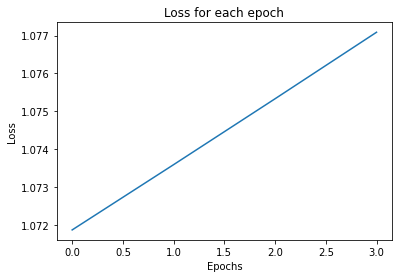

In [20]:
plt.plot(range(len(costs)),costs)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss for each epoch")